# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)


# 建立模型

In [38]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization

In [39]:
#建立模型
model = Sequential()
model.add(Dense(units=512, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=128, kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=32, kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [40]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_13 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
__________

In [41]:
rand_ = np.random.choice(60000, 10000)

# 訓練模型

In [42]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [44]:
train_history =model.fit(x=x_Train_normalize[rand_],
                         y=y_Train_OneHot[rand_],validation_split=0.2, 
                         epochs=10, batch_size=16,verbose=1)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 76s 10ms/step - loss: nan - acc: 0.0964 - val_loss: nan - val_acc: 0.0945
Epoch 2/10
8000/8000 [==============================] - 76s 9ms/step - loss: nan - acc: 0.0964 - val_loss: nan - val_acc: 0.0945
Epoch 3/10
8000/8000 [==============================] - 76s 10ms/step - loss: nan - acc: 0.0964 - val_loss: nan - val_acc: 0.0945
Epoch 4/10
8000/8000 [==============================] - 76s 10ms/step - loss: nan - acc: 0.0964 - val_loss: nan - val_acc: 0.0945
Epoch 5/10
8000/8000 [==============================] - 76s 9ms/step - loss: nan - acc: 0.0964 - val_loss: nan - val_acc: 0.0945
Epoch 6/10
8000/8000 [==============================] - 76s 10ms/step - loss: nan - acc: 0.0964 - val_loss: nan - val_acc: 0.0945
Epoch 7/10
8000/8000 [==============================] - 77s 10ms/step - loss: nan - acc: 0.0964 - val_loss: nan - val_acc: 0.0945
Epoch 8/10
8000/8000 [======================

# 以圖形顯示訓練過程

In [45]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

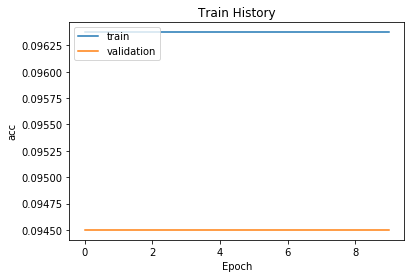

In [46]:
show_train_history(train_history,'acc','val_acc')

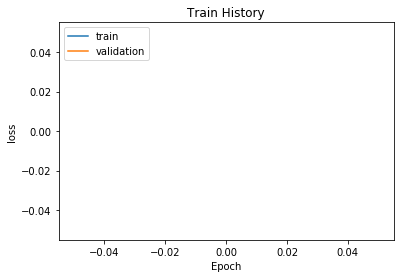

In [47]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [48]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 40s 4ms/step

accuracy= 0.098
